# Bias Variance Trade off

![](./../images/BiasVarianceTradeOff.png)

# Overfitting

![image.png](./../images/overfitting.png)

## Training Test Validation

![image.png](./../images/TrainingTestValidation.png)

![image.png](./../images/ComplexityvsPredictionError.png)

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split


Automatically created module for IPython interactive environment


In [3]:


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 40
degrees = [1, 4 , 10, 25]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) #+ np.random.randn(n_samples) * 0.2
y[::5] += 2 * (0.2 - np.random.rand(n_samples // 5))


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)



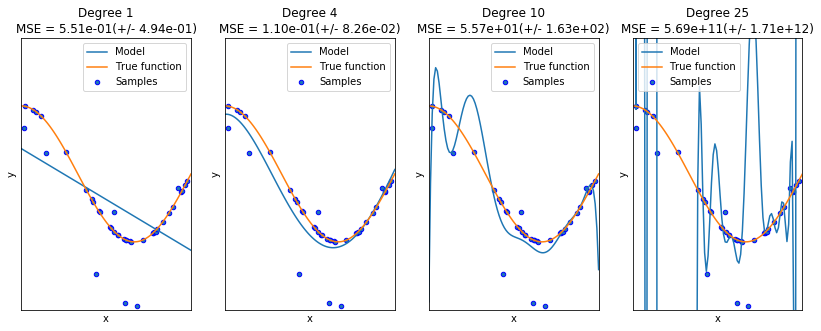

In [4]:
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x_train[:, np.newaxis], y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [51]:
np.random.randn()*10

-2.420198298702195

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# generate 20 points from uniform (-3,3)
x = np.random.uniform(0, 5, size=50)
y = np.sin(x) + np.random.normal(scale=0.1, size=len(x))



In [6]:
y

array([ 0.88346488,  1.05954743,  0.3331018 ,  0.65896729, -0.82495954,
        0.67796169,  0.98249305,  0.70390995, -0.2307071 ,  1.05949062,
        0.68399622,  1.062073  ,  0.73458459,  0.6219493 , -0.10396123,
        0.70789974,  0.83316579,  1.14159937, -0.80843046,  0.50685522,
       -0.67817712,  0.32743965, -1.11264877,  0.8131359 , -1.10265648,
        0.31145792, -0.56807166,  0.11994213,  1.18003226,  0.71350482,
        1.18270006,  0.64998526,  0.91369466,  1.06834029,  0.28846618,
       -0.23504979,  0.39843634,  0.95491489,  0.56292584,  0.54484174,
        0.29652031, -1.10776893,  1.02958076, -0.06157847,  0.54286132,
       -0.44094216,  0.94883542,  0.97807205,  0.27473861,  0.14111463])

<Figure size 1296x720 with 0 Axes>

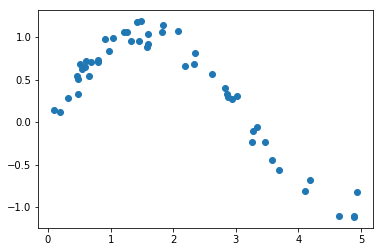

In [7]:
plt.figure(figsize=(18, 10))
fig, ax = plt.subplots()
ax.scatter(x,y)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

<Figure size 1008x360 with 0 Axes>

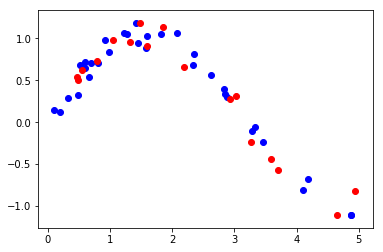

In [14]:
plt.figure(figsize=(14, 5))
fig, ax = plt.subplots()
ax.scatter(x_train,y_train,c='b')
ax.scatter(x_test,y_test,c='r')

In [ ]:
Y=numpy.random.normal(2*X+2,20)

In [40]:
import matplotlib.pyplot as pl
import numpy as np

x = np.linspace(1, 10,37)

y = np.sin(x) + np.random.normal(scale=0.3, size=len(x))


In [41]:
x

array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,
        3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,  5.25,
        5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,  7.  ,  7.25,  7.5 ,
        7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,  9.25,  9.5 ,  9.75,
       10.  ])

In [42]:
y

array([ 0.5269051 ,  0.52297924,  0.48561393,  1.56921857,  0.75640177,
        0.64665091,  0.22263354,  0.6149081 , -0.34304935, -0.17201722,
       -0.6194232 , -0.45549057, -0.91004404, -1.24917901, -0.98598479,
       -0.87079323, -0.93896911, -0.76819292, -0.89583695, -0.61710143,
       -0.48115363, -0.14104517, -0.0288239 , -0.06784071,  0.71021444,
        0.7025466 ,  0.44894047,  1.13343346,  0.71716874,  0.93818783,
        1.01721428,  0.66341883,  0.75393869, -0.19655826,  0.04555137,
       -0.52496222, -0.80526026])

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

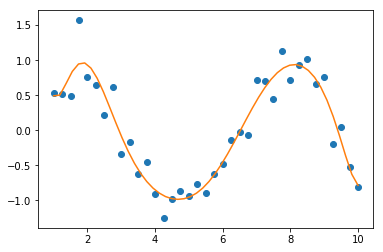

In [44]:
model = np.polyfit(x, y, 10)
p = np.poly1d(model)
t = np.linspace(1, 10)
pl.plot(x,y,'o',t, p(t), '-')


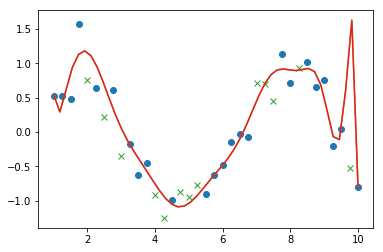

In [45]:
p = np.poly1d(np.polyfit(x_train, y_train, 15))
t = np.linspace(1, 10)
pl.plot(x_train,y_train,'o',t, p(t), '-')
pl.plot(x_test,y_test,'x',t, p(t), '-')

In [ ]:
polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, c='m')
plt.show()

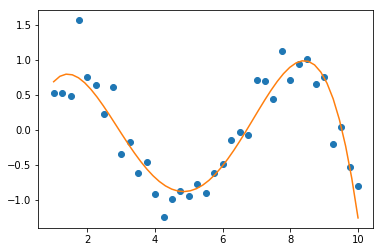

In [46]:
p = np.poly1d(np.polyfit(x, y, 4))
t = np.linspace(1, 10)
pl.plot(x,y,'o',t, p(t), '-')


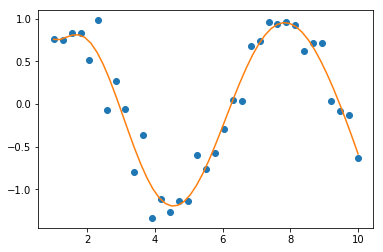

In [164]:
p = np.poly1d(np.polyfit(x, y, 8))
t = np.linspace(1, 10)
pl.plot(x,y,'o',t, p(t), '-')


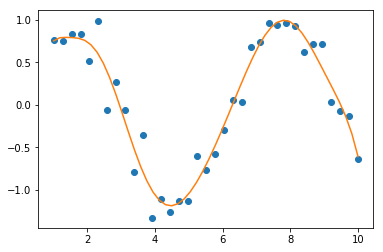

In [165]:
p = np.poly1d(np.polyfit(x, y, 12))
t = np.linspace(1, 10)
pl.plot(x,y,'o',t, p(t), '-')


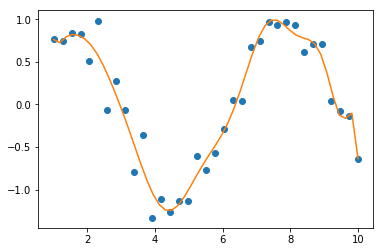

In [166]:
p = np.poly1d(np.polyfit(x, y, 16))
t = np.linspace(1, 10)
pl.plot(x,y,'o',t, p(t), '-')


/opt/conda/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


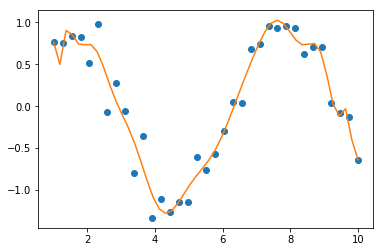

In [167]:
p = np.poly1d(np.polyfit(x, y, 20))
t = np.linspace(1, 10)
pl.plot(x,y,'o',t, p(t), '-')


2.0243974275604706
0.9941487971704481


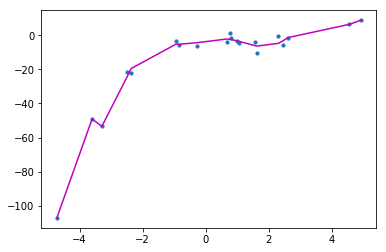

In [48]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, c='m')
plt.show()

In [49]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))
  print("R2 score of test set is {}".format(r2_test))


In [50]:
create_polynomial_regression_model(2)


NameError: name 'X_train' is not defined

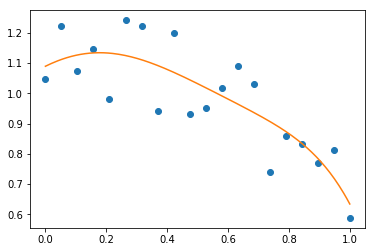

In [107]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12)

x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20)
p = np.poly1d(np.polyfit(x, y, 5))

t = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', t, p(t), '-')
plt.show()

In [16]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
print(x[:5])
rng = np.random.RandomState(42)
rng.shuffle(x)
print(x[:5])
x = np.sort(x[:50])
y = f(x)
# Add noise to targets
#y[::5] += 3 * (0.5 - rng.rand(x.shape[0] // 5))

[0.        0.1010101 0.2020202 0.3030303 0.4040404]
[8.38383838 5.35353535 7.07070707 4.54545455 4.44444444]


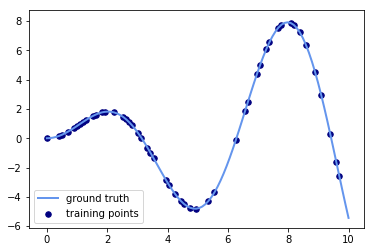

In [17]:
# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]


colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw, label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
plt.legend(loc='lower left')

plt.show()

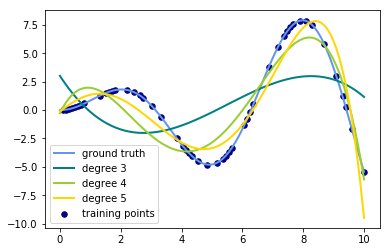

In [11]:
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw, label="ground truth")


for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()